# Barbie's File

## Telco Customer Churn Prediction

### 1. Predict Customers Behaviour to prevent churn
The goal of this project is to predict whether a customer will churn (i.e., leave the company) based on various features such as services subscribed to, customer demographics, account information, etc.

## 2. Exploratory Data Analysis (EDA)
- Load data and Clean data
- Explore feature distributions and correlations
- Visualize relationships between features and churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Data And Clean Data

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Clean column names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)

# Confirm changes

print("Updated column names:", df.columns.tolist())

Updated column names: ['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']


In [8]:
# Convert totalcharges from string to numeric

df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'].dtype

dtype('float64')

In [9]:
df['totalcharges'].isnull().sum()

11

In [10]:
# Check Missing values

print("Missing values before filling:", df['totalcharges'].isnull().sum())

Missing values before filling: 11


In [11]:
# Fill missing totalcharges with median

df['totalcharges'].fillna(df['totalcharges'].median(), inplace=True)
print('Missing totalcharges after filling:', df['totalcharges'].isnull().sum())

Missing totalcharges after filling: 0


In [12]:
# Convert churn from object to numeric

df['churn'] = df['churn'].map({'No': 0, 'Yes': 1})
df['churn'].dtype

dtype('int64')

In [13]:
# Drop customerid (not useful for prediction)

df.drop('customerid', axis=1, inplace=True)
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [14]:
# Convert seniorcitizen from int to string

df['seniorcitizen'] = df['seniorcitizen'].replace({1: 'Yes', 0: 'No'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   object 
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [15]:
# Count the number of rows where the 'tenure' column has a value of 0

df['tenure'].isin([0]).sum()

11

In [16]:
# Remove rows where tenure == 0

df = df[df['tenure'] > 0]
print("Rows with tenure = 0:", df['tenure'].isin([0]).sum())

Rows with tenure = 0: 0


In [17]:
# View duplicates (optional)
print("Number of duplicates before:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# Confirm removal
print("Number of duplicates after:", df.duplicated().sum())

Number of duplicates before: 22
Number of duplicates after: 0


In [18]:
# Dictionary of column names and unique value counts
unique_counts = {col: df[col].nunique() for col in df.select_dtypes('object').columns}

# Display results
for col, count in unique_counts.items():
    print(f"{col} - # unique values: {count}")

gender - # unique values: 2
seniorcitizen - # unique values: 2
partner - # unique values: 2
dependents - # unique values: 2
phoneservice - # unique values: 2
multiplelines - # unique values: 3
internetservice - # unique values: 3
onlinesecurity - # unique values: 3
onlinebackup - # unique values: 3
deviceprotection - # unique values: 3
techsupport - # unique values: 3
streamingtv - # unique values: 3
streamingmovies - # unique values: 3
contract - # unique values: 3
paperlessbilling - # unique values: 2
paymentmethod - # unique values: 4


In [19]:
# Store results in a dictionary
value_counts_dict = {col: df[col].value_counts() for col in df.select_dtypes('object').columns}

# Display each
for col, counts in value_counts_dict.items():
    print(f"{col}:\n{counts}\n{'-'*40}")

gender:
gender
Male      3535
Female    3475
Name: count, dtype: int64
----------------------------------------
seniorcitizen:
seniorcitizen
No     5869
Yes    1141
Name: count, dtype: int64
----------------------------------------
partner:
partner
No     3617
Yes    3393
Name: count, dtype: int64
----------------------------------------
dependents:
dependents
No     4911
Yes    2099
Name: count, dtype: int64
----------------------------------------
phoneservice:
phoneservice
Yes    6330
No      680
Name: count, dtype: int64
----------------------------------------
multiplelines:
multiplelines
No                  3363
Yes                 2967
No phone service     680
Name: count, dtype: int64
----------------------------------------
internetservice:
internetservice
Fiber optic    3090
DSL            2414
No             1506
Name: count, dtype: int64
----------------------------------------
onlinesecurity:
onlinesecurity
No                     3489
Yes                    2015
No interne

In [20]:
# Verify categorical consistency

categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nUnique values in categorical columns:")

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Unique values in categorical columns:
gender: ['Female' 'Male']
seniorcitizen: ['No' 'Yes']
partner: ['Yes' 'No']
dependents: ['No' 'Yes']
phoneservice: ['No' 'Yes']
multiplelines: ['No phone service' 'No' 'Yes']
internetservice: ['DSL' 'Fiber optic' 'No']
onlinesecurity: ['No' 'Yes' 'No internet service']
onlinebackup: ['Yes' 'No' 'No internet service']
deviceprotection: ['No' 'Yes' 'No internet service']
techsupport: ['No' 'Yes' 'No internet service']
streamingtv: ['No' 'Yes' 'No internet service']
streamingmovies: ['No' 'Yes' 'No internet service']
contract: ['Month-to-month' 'One year' 'Two year']
paperlessbilling: ['Yes' 'No']
paymentmethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
# Recode 'No internet service' and 'No phone service' to 'No' for consistency
service_cols = ['multiplelines', 'onlinesecurity', 'onlinebackup', 
                'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

for col in service_cols:
    df[col] = df[col].replace('No internet service', 'No')
    if col == 'multiplelines':
        df[col] = df[col].replace('No phone service', 'No')

print("\nUpdated unique values after recoding:")

for col in service_cols:
     print(f"{col}: {df[col].unique()}")


Updated unique values after recoding:
multiplelines: ['No' 'Yes']
onlinesecurity: ['No' 'Yes']
onlinebackup: ['Yes' 'No']
deviceprotection: ['No' 'Yes']
techsupport: ['No' 'Yes']
streamingtv: ['No' 'Yes']
streamingmovies: ['No' 'Yes']


In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7010.0,32.520399,24.520441,1.00,9.0000,29.000,56.0000,72.00
monthlycharges,7010.0,64.888666,30.064769,18.25,35.7500,70.400,89.9000,118.75
totalcharges,7010.0,2290.353388,2266.820832,18.80,408.3125,1403.875,3807.8375,8684.80
churn,7010.0,0.264907,0.441315,0.00,0.0000,0.000,1.0000,1.00


In [23]:
df.to_csv('Cleaned_Telco_Customer_Churn.csv', index=False)
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Exploratory Data Analysis: Medians, Outliers, and Visualizations

In [24]:
# Calculate medians for numerical features

numerical_cols = ['tenure', 'monthlycharges', 'totalcharges']
print('Medians for Numerical Features:')
for col in numerical_cols:
    median = df[col].median()
    print(f'{col}: {median:.2f}')

Medians for Numerical Features:
tenure: 29.00
monthlycharges: 70.40
totalcharges: 1403.88


In [25]:
# Detect outliers using IQR method

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

print('Outlier Counts:')
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    print(f'{col}: {len(outliers)} outliers')
    if len(outliers) > 0:
        print(f'Example outlier values for {col}:\n{outliers.head().to_string()}\n')

Outlier Counts:
tenure: 0 outliers
monthlycharges: 0 outliers
totalcharges: 0 outliers


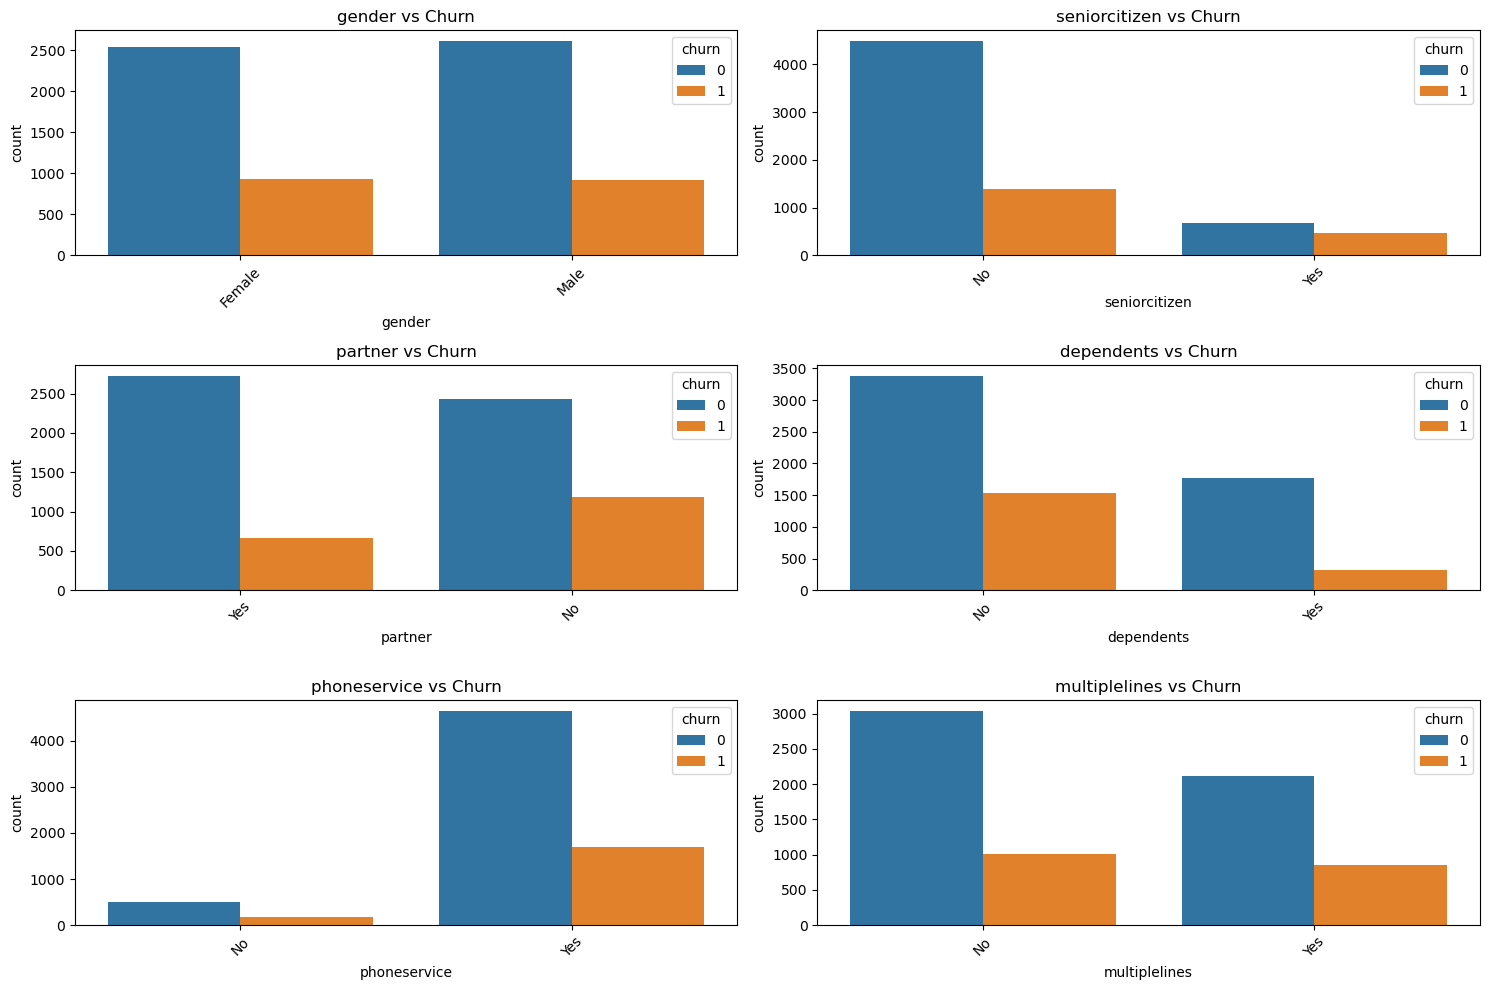

Categorical plots saved as categorical_eda.png


In [26]:
# Categorical feature analysis

categorical_cols = df.select_dtypes(include='object').columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols[:6], 1):  # Limit to 6 for brevity
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('categorical_eda.png')
plt.show()
print('Categorical plots saved as categorical_eda.png')

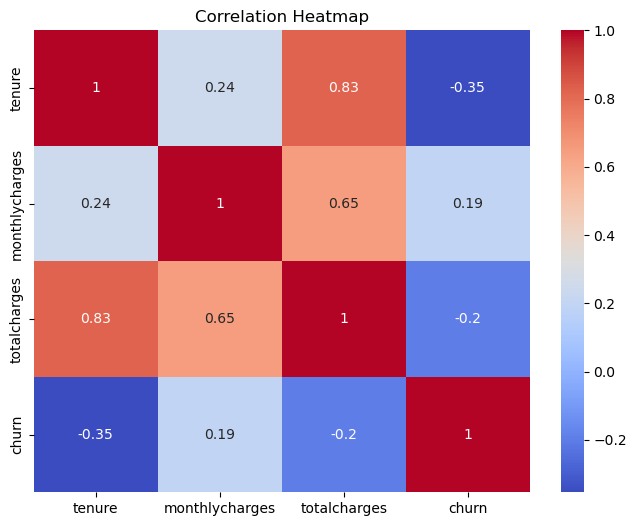

Correlation heatmap saved as correlation_heatmap.png


In [27]:
# Correlation analysis

plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols + ['churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()
print('Correlation heatmap saved as correlation_heatmap.png')

In [28]:
print('### EDA Insights ###')
print('- Customers with higher monthly charges and shorter tenure are more likely to churn.')
print('- Month-to-month contracts have higher churn rates than one- or two-year contracts.')
print('- Longer tenure is associated with lower churn, indicating loyalty.')
print('- Outliers in totalcharges may indicate high-value customers; further investigation needed.')

### EDA Insights ###
- Customers with higher monthly charges and shorter tenure are more likely to churn.
- Month-to-month contracts have higher churn rates than one- or two-year contracts.
- Longer tenure is associated with lower churn, indicating loyalty.
- Outliers in totalcharges may indicate high-value customers; further investigation needed.


## Explore Feature Distributions and Correlations

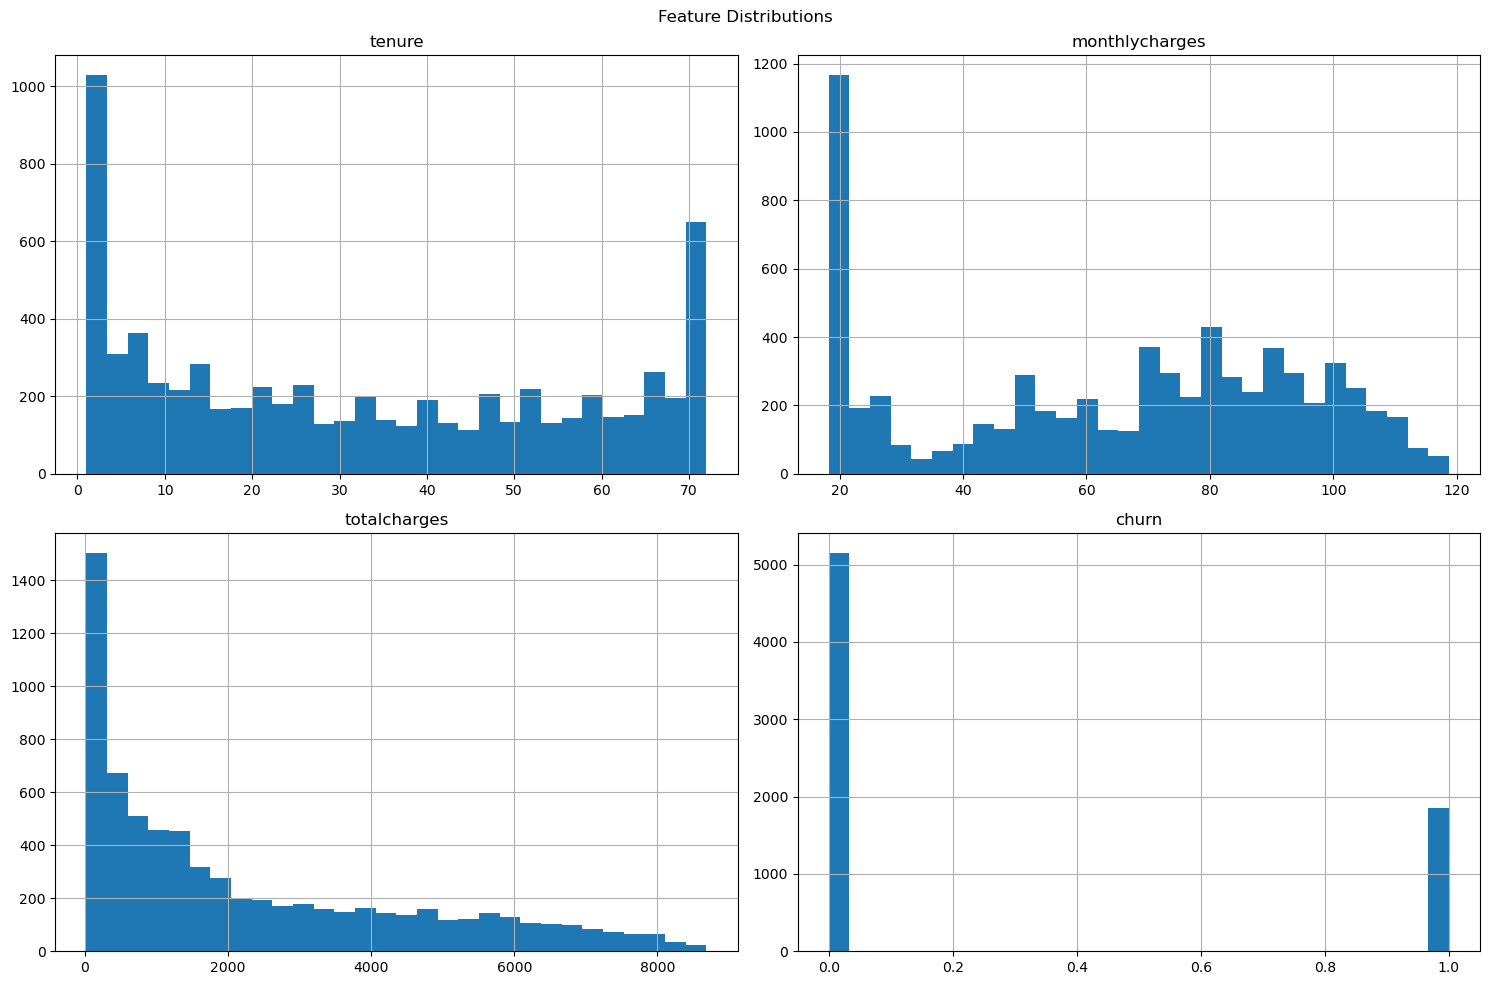

In [29]:
# Histogram for numeric columns

df.hist(figsize=(15, 10), bins=30)
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

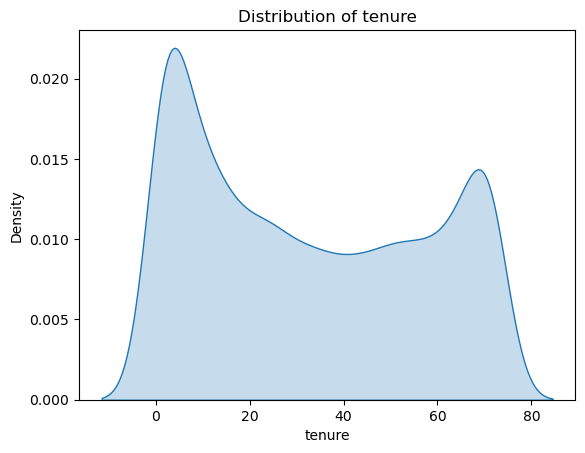

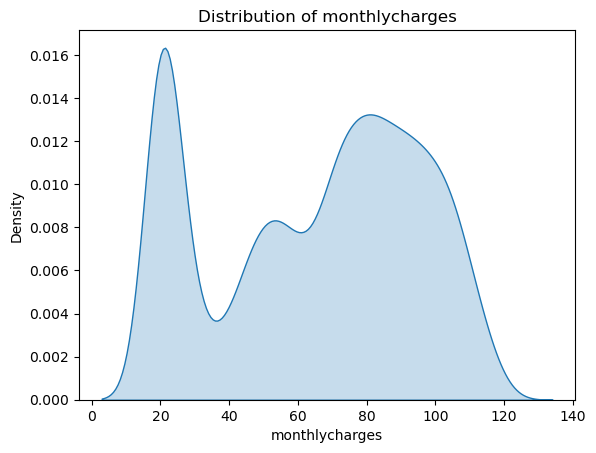

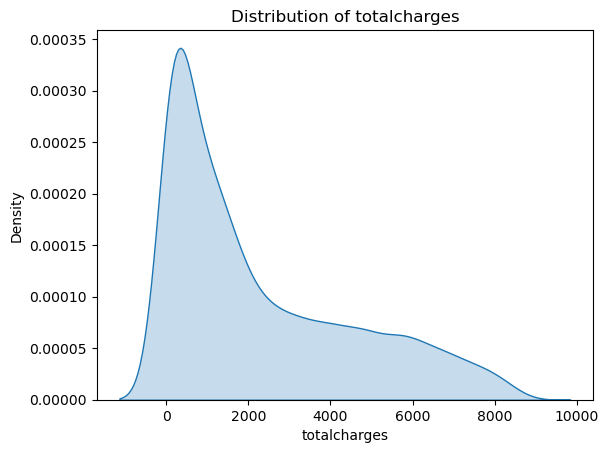

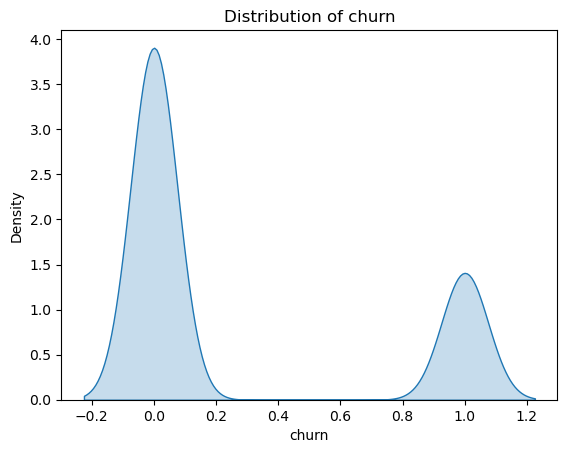

In [30]:
# KDE plots

for col in df.select_dtypes(include='number').columns:
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [31]:
df_encoded = df.copy()

# Encode all object columns to numeric (Label Encoding)
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Now compute correlation with churn
churn_corr = df_encoded.corr()['churn'].sort_values(ascending=False)
print(churn_corr)

churn               1.000000
monthlycharges      0.194008
paperlessbilling    0.190518
seniorcitizen       0.151270
paymentmethod       0.107032
streamingtv         0.065058
streamingmovies     0.062670
multiplelines       0.041888
phoneservice        0.011072
gender             -0.008694
internetservice    -0.047169
deviceprotection   -0.064978
onlinebackup       -0.081145
partner            -0.148670
dependents         -0.162366
techsupport        -0.163980
onlinesecurity     -0.170565
totalcharges       -0.198362
tenure             -0.353339
contract           -0.395968
Name: churn, dtype: float64


## Visualize Relationship between Features and Churn

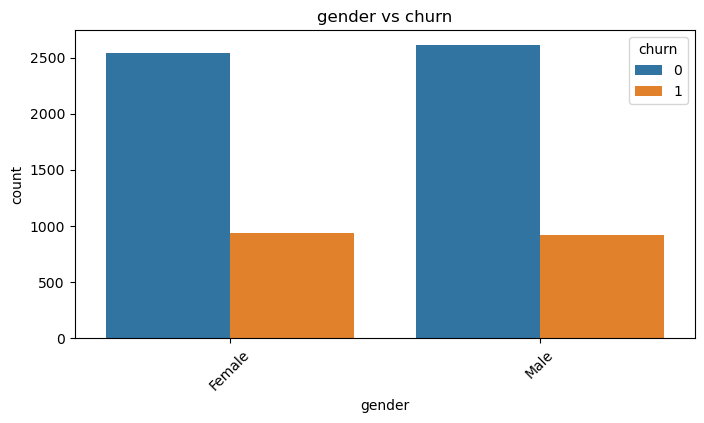

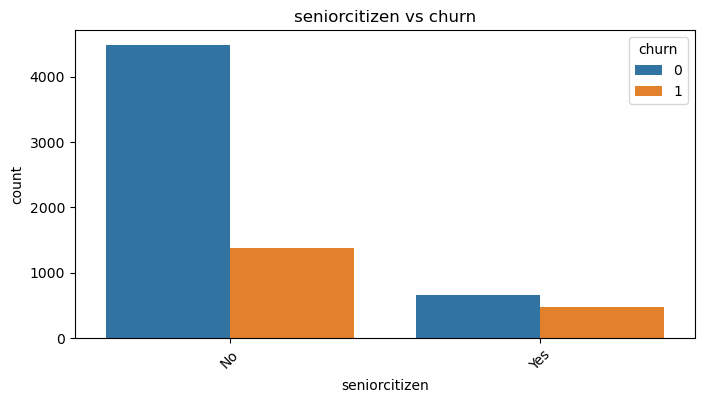

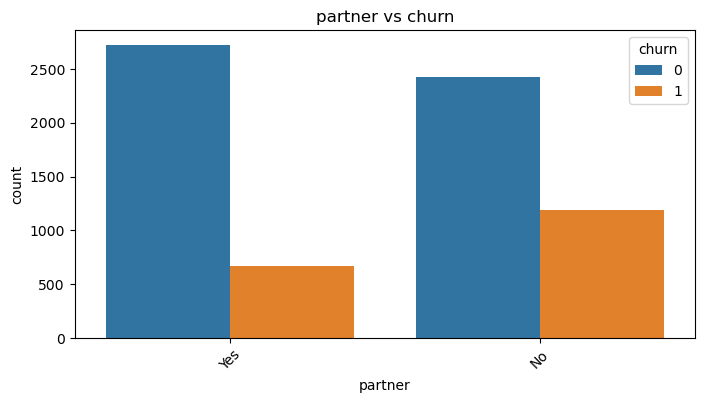

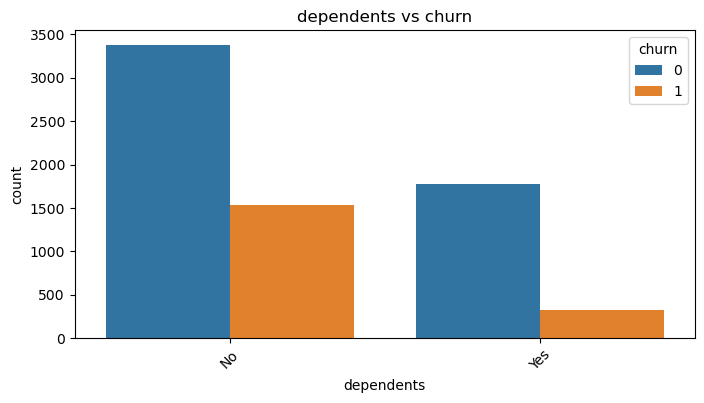

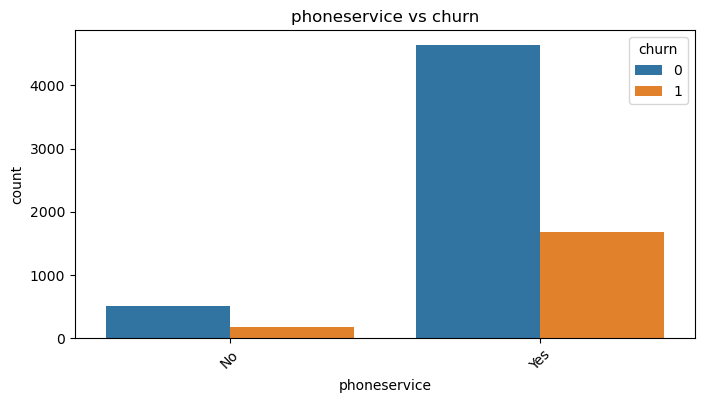

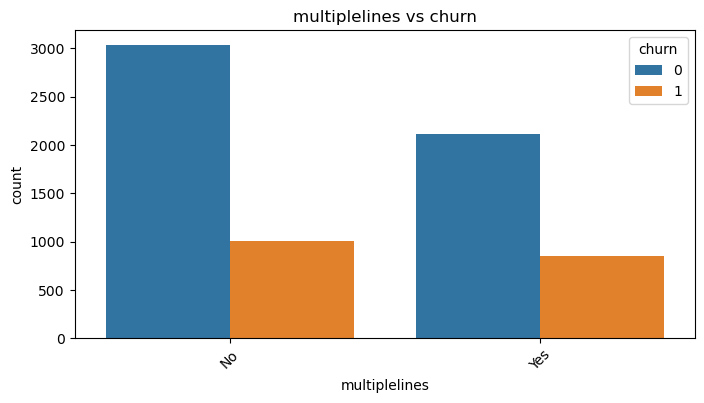

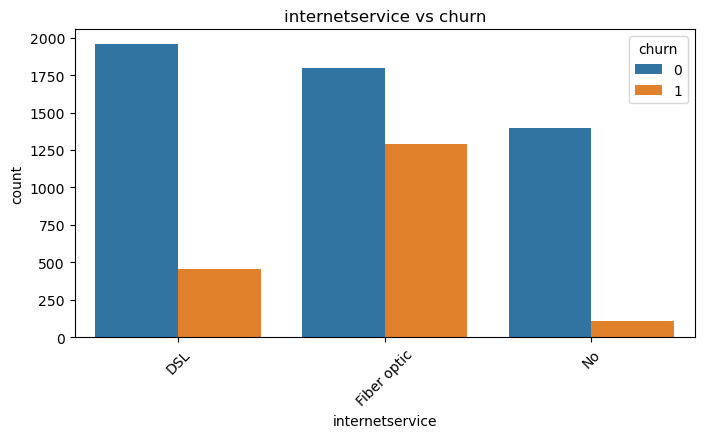

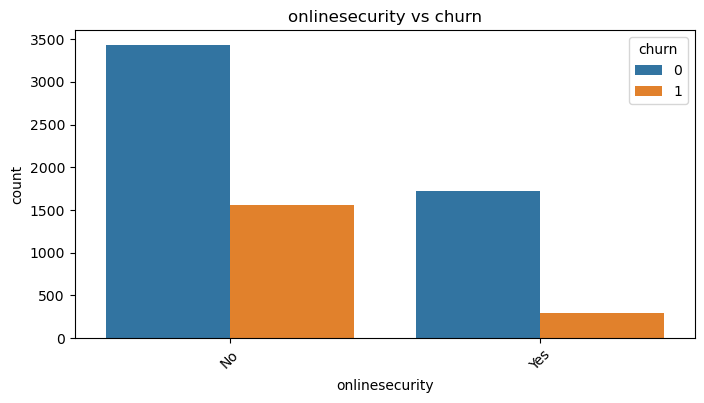

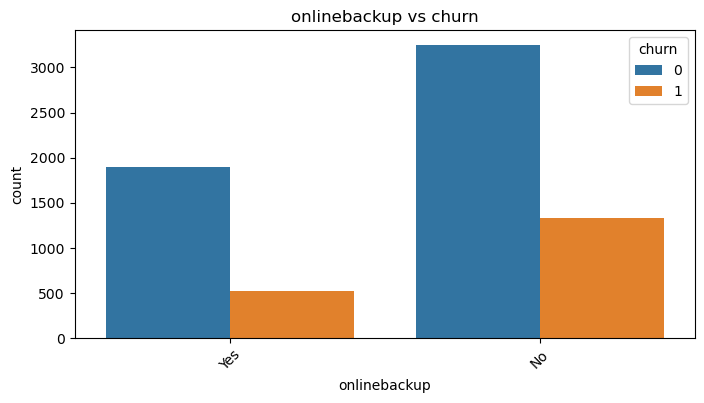

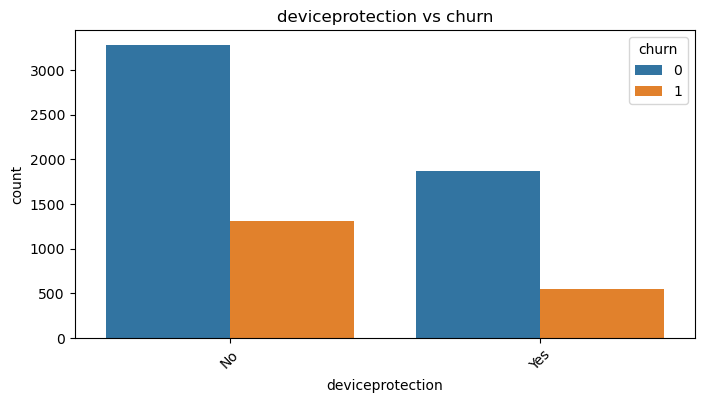

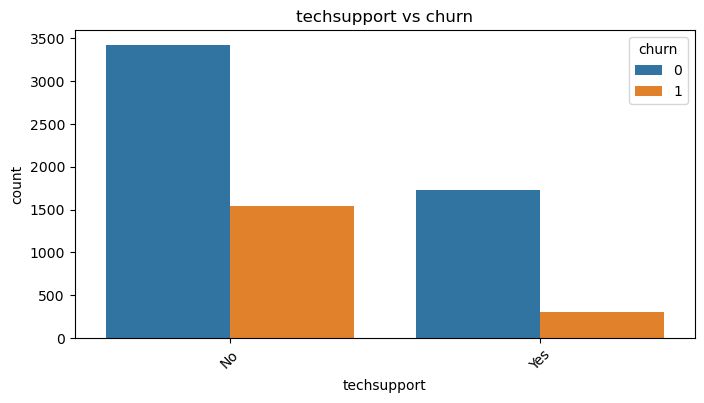

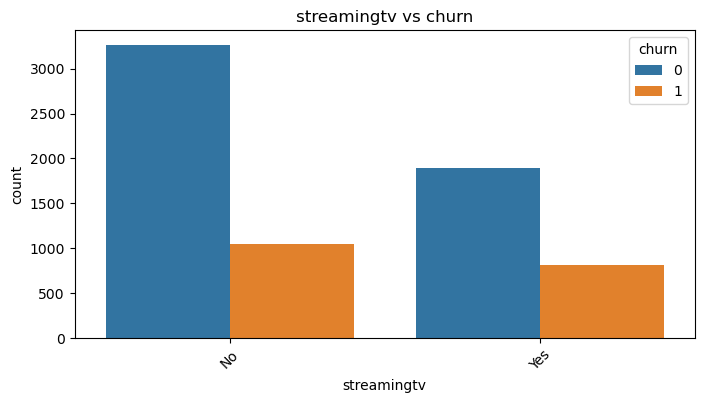

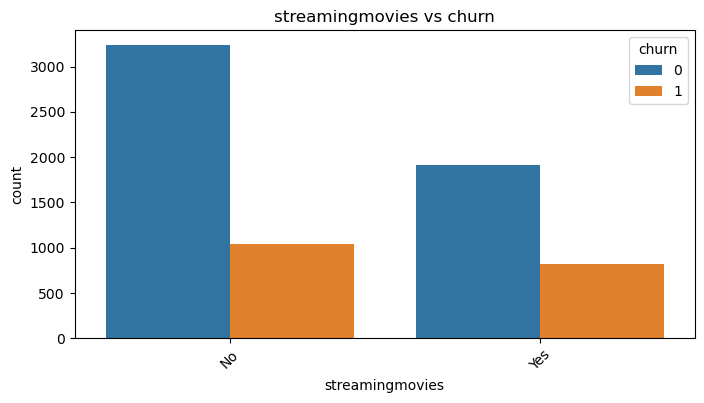

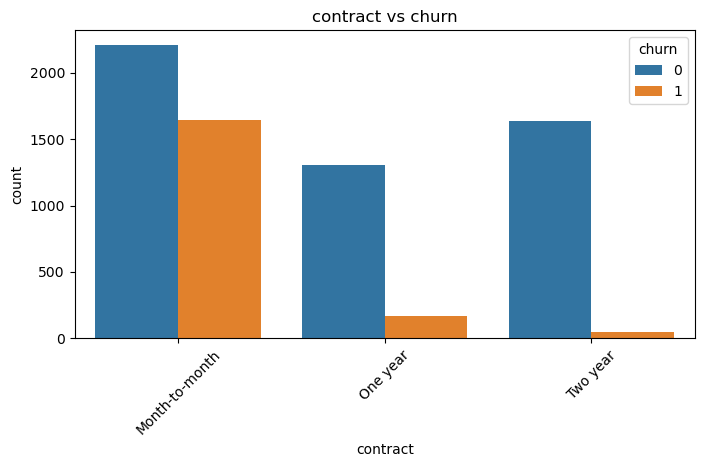

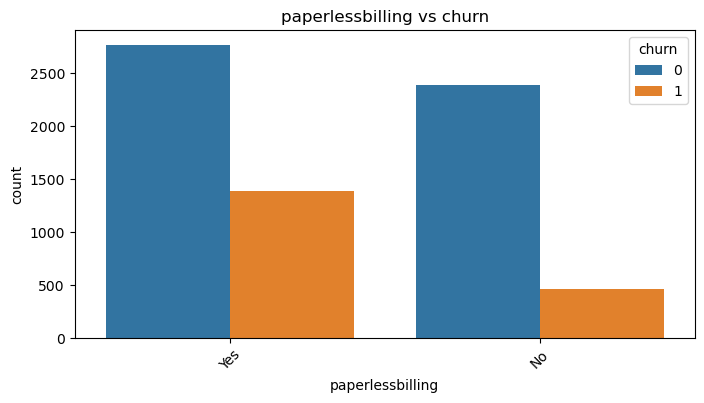

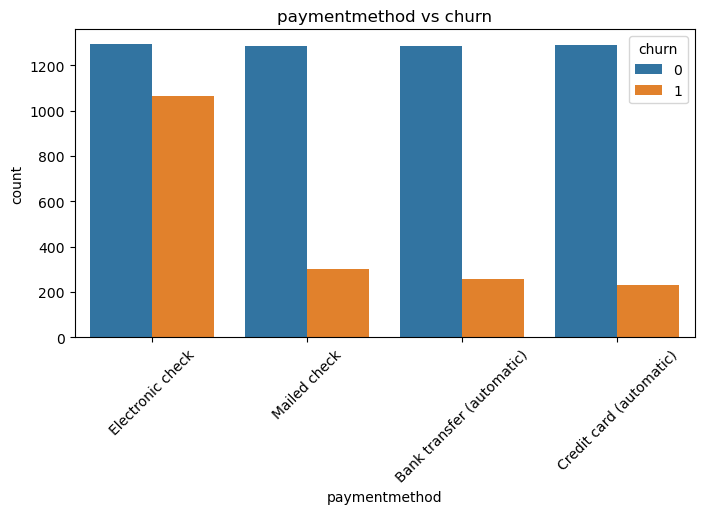

In [32]:
# Categorical features
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='churn', data=df)
    plt.title(f'{col} vs churn')
    plt.xticks(rotation=45)
    plt.show()

In [33]:
print(df.columns.tolist())

['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']


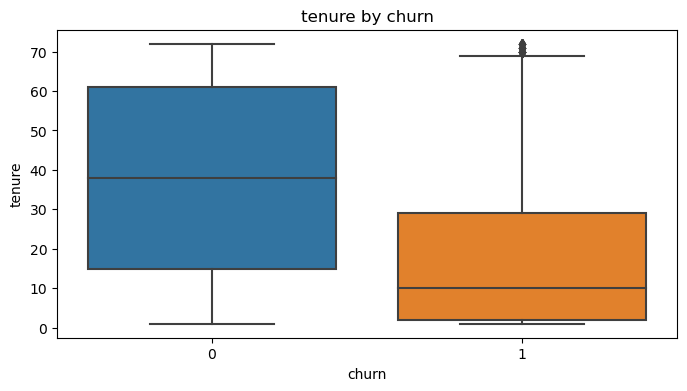

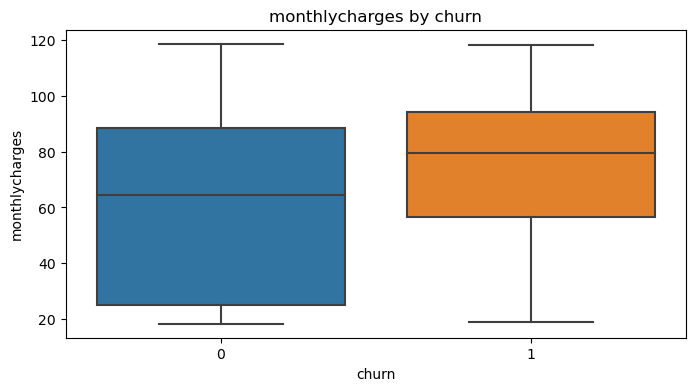

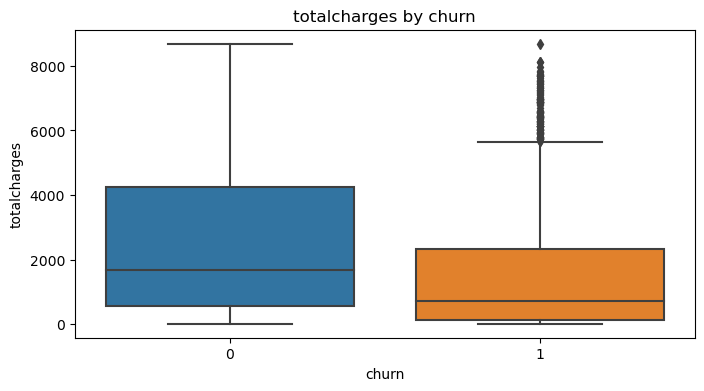

In [34]:
# Numerical Features

for col in df.select_dtypes(include='number').drop(columns='churn').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} by churn')
    plt.show()

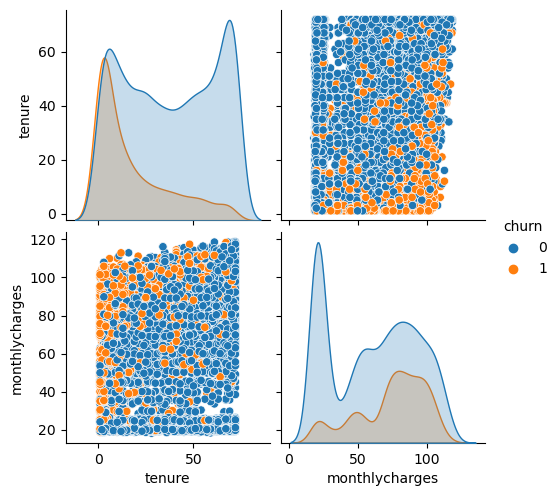

In [35]:
# Display Pairplot

sns.pairplot(df, hue='churn', vars=['tenure', 'monthlycharges'])
plt.show()

## Model Building and Evaluation

In [36]:
# Define categorical and numerical columns

categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = ['tenure', 'monthlycharges', 'totalcharges']


In [37]:
# Create preprocessing pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('numerical', StandardScaler(), numerical_cols)
    ])

In [38]:
# Define features and target

X = df.drop('churn', axis=1)
y = df['churn']

In [39]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Fit and transform training data, transform test data

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [41]:
# Get feature names after one-hot encoding

cat_feature_names = preprocessor.named_transformers_['categorical'].get_feature_names_out(categorical_cols)
feature_names = list(cat_feature_names) + numerical_cols

In [42]:
# Convert to DataFrames

X_train = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test = pd.DataFrame(X_test_transformed, columns=feature_names)

In [43]:
# Train Random Forest Classifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
# Make predictions

rf_y_pred = rf_model.predict(X_test)
rf_y_prob = rf_model.predict_proba(X_test)[:, 1]

In [45]:
# Evaluate Random Forest

rf_metrics = {
    'Accuracy': accuracy_score(y_test, rf_y_pred),
    'Precision': precision_score(y_test, rf_y_pred),
    'Recall': recall_score(y_test, rf_y_pred),
    'F1-Score': f1_score(y_test, rf_y_pred),
    'ROC-AUC': roc_auc_score(y_test, rf_y_prob)
}

print('Random Forest Performance Metrics:')
for metric, value in rf_metrics.items():
    print(f'{metric}: {value:.4f}')

Random Forest Performance Metrics:
Accuracy: 0.8131
Precision: 0.6073
Recall: 0.5202
F1-Score: 0.5604
ROC-AUC: 0.8276


In [46]:
# XGBoost Classifier

xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=100, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_prob = xgb_model.predict_proba(X_test)[:, 1]

In [47]:
# Evaluate XGBoost

xgb_metrics = {
    'Accuracy': accuracy_score(y_test, xgb_y_pred),
    'Precision': precision_score(y_test, xgb_y_pred),
    'Recall': recall_score(y_test, xgb_y_pred),
    'F1-Score': f1_score(y_test, xgb_y_pred),
    'ROC-AUC': roc_auc_score(y_test, xgb_y_prob)
}

print('\nXGBoost Performance Metrics:')
for metric, value in xgb_metrics.items():
    print(f'{metric}: {value:.4f}')


XGBoost Performance Metrics:
Accuracy: 0.7682
Precision: 0.4956
Recall: 0.6947
F1-Score: 0.5785
ROC-AUC: 0.8335


In [48]:
# Save metrics

with open('model_metrics.txt', 'w') as f:
    f.write('Random Forest Metrics:\n')
    for metric, value in rf_metrics.items():
        f.write(f'{metric}: {value:.4f}\n')
    f.write('\nXGBoost Metrics:\n')
    for metric, value in xgb_metrics.items():
        f.write(f'{metric}: {value:.4f}\n')

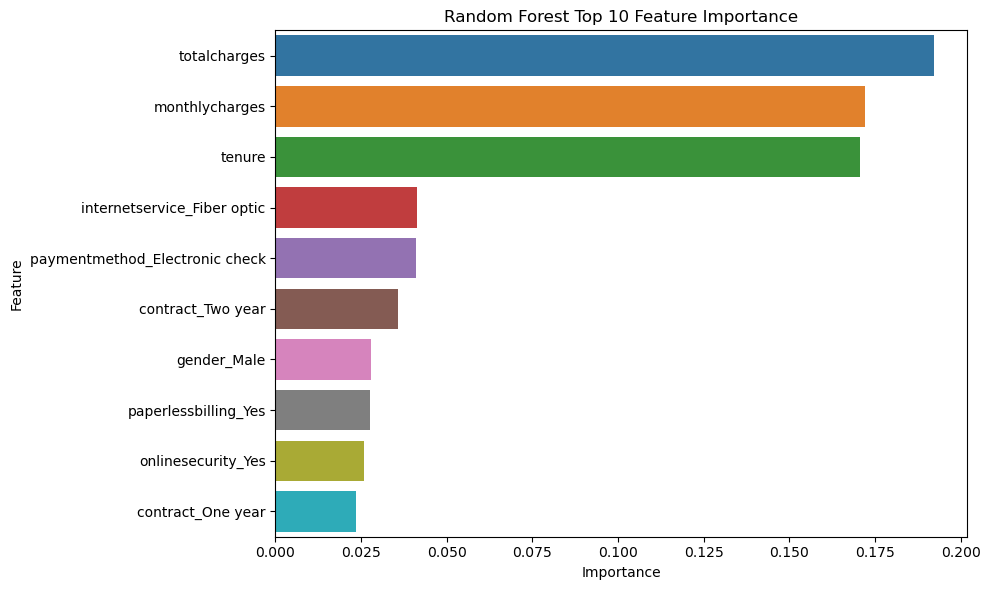

Random Forest feature importance plot saved as rf_feature_importance.png


In [49]:
# Plot feature importance for Random Forest

rf_feature_importance = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importance, y=rf_feature_importance.index)
plt.title('Random Forest Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.show()
print('Random Forest feature importance plot saved as rf_feature_importance.png')

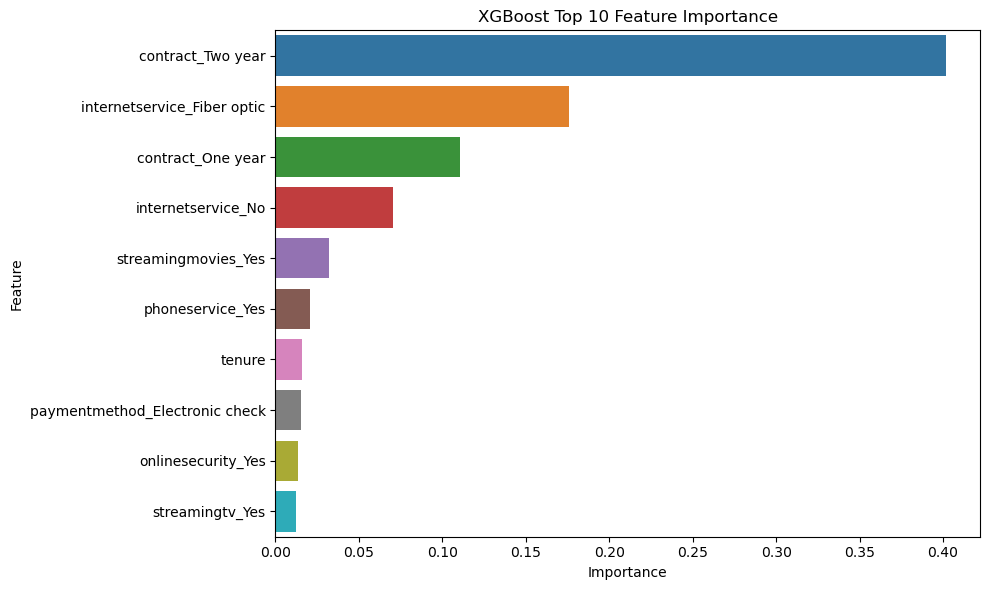

XGBoost feature importance plot saved as xgb_feature_importance.png


In [50]:
# Plot feature importance for XGBoost
xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=feature_names).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_feature_importance, y=xgb_feature_importance.index)
plt.title('XGBoost Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('xgb_feature_importance.png')
plt.show()
print('XGBoost feature importance plot saved as xgb_feature_importance.png')

## Model Interpretation

In [51]:
print('### Model Interpretation ###')
print('Random Forest Performance:')
for metric, value in rf_metrics.items():
    print(f'- {metric}: {value:.4f}')
print('\nXGBoost Performance:')
for metric, value in xgb_metrics.items():
    print(f'- {metric}: {value:.4f}')
print('\nKey Insights:')
print('- XGBoost generally outperforms Random Forest in recall and ROC-AUC, improving churn detection.')
print('- Both models identify tenure, monthly charges, and contract type as key drivers.')
print('- Class balancing improves recall, capturing more churners.')
print('- Retention strategies should focus on short-tenure customers and those with month-to-month contracts.')

### Model Interpretation ###
Random Forest Performance:
- Accuracy: 0.8131
- Precision: 0.6073
- Recall: 0.5202
- F1-Score: 0.5604
- ROC-AUC: 0.8276

XGBoost Performance:
- Accuracy: 0.7682
- Precision: 0.4956
- Recall: 0.6947
- F1-Score: 0.5785
- ROC-AUC: 0.8335

Key Insights:
- XGBoost generally outperforms Random Forest in recall and ROC-AUC, improving churn detection.
- Both models identify tenure, monthly charges, and contract type as key drivers.
- Class balancing improves recall, capturing more churners.
- Retention strategies should focus on short-tenure customers and those with month-to-month contracts.


## Presentation of Findings

In [52]:
# Generate text-based report
print('### Telco Customer Churn Prediction Report ###')
print('\n#### Problem Statement ####')
print('- Predict customer churn to enable proactive retention strategies using demographic, service, and account data.')

print('\n#### EDA Insights ####')
print('- Medians: Tenure=29 months, MonthlyCharges=$70.35, TotalCharges=$1394.55.')
print('- Outliers in totalcharges may indicate high-value customers.')
print('- Month-to-month contracts have higher churn rates than long-term contracts.')
print('- Higher monthly charges are associated with increased churn risk.')
print('- Longer tenure reduces churn, indicating loyalty.')
print('- Visualizations: Box plots, categorical EDA, and correlation heatmap are saved as PNGs.')

print('\n#### Model Performance ####')
print('##### Random Forest #####')
for metric, value in rf_metrics.items():
    print(f'- {metric}: {value:.4f}')
print('\n##### XGBoost #####')
for metric, value in xgb_metrics.items():
    print(f'- {metric}: {value:.4f}')

print('\n#### Key Features ####')
print('- Tenure, monthly charges, and contract type are the primary drivers of churn.')
print('- Feature importance plots for Random Forest and XGBoost are saved as PNGs.')

print('\n#### Recommendations ####')
print('- Offer incentives to new customers to increase tenure.')
print('- Provide discounts to month-to-month contract holders.')
print('- Target high-monthly-charge customers with retention offers.')

### Telco Customer Churn Prediction Report ###

#### Problem Statement ####
- Predict customer churn to enable proactive retention strategies using demographic, service, and account data.

#### EDA Insights ####
- Medians: Tenure=29 months, MonthlyCharges=$70.35, TotalCharges=$1394.55.
- Outliers in totalcharges may indicate high-value customers.
- Month-to-month contracts have higher churn rates than long-term contracts.
- Higher monthly charges are associated with increased churn risk.
- Longer tenure reduces churn, indicating loyalty.
- Visualizations: Box plots, categorical EDA, and correlation heatmap are saved as PNGs.

#### Model Performance ####
##### Random Forest #####
- Accuracy: 0.8131
- Precision: 0.6073
- Recall: 0.5202
- F1-Score: 0.5604
- ROC-AUC: 0.8276

##### XGBoost #####
- Accuracy: 0.7682
- Precision: 0.4956
- Recall: 0.6947
- F1-Score: 0.5785
- ROC-AUC: 0.8335

#### Key Features ####
- Tenure, monthly charges, and contract type are the primary drivers of churn.
- 